In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u

In [2]:
class radio_galaxy:
    '''
    a class containing teh observed properties of a radio galaxy from
    which other properties can be calculated/derived
    '''
    def __init__(self,z,flux,vobs,spec_index):
        '''
        initialise the galaxy with a redshift, flux a an observed 
        frequecy and a spectral index
        flux should be given in jy
        '''
        self.z = z
        self.flux = flux * 1E-26
        self.vobs = vobs
        self.spec_index = spec_index
        
    def radio_kcorrection(self,vrest):
        '''
        k corrects a radio luminosity from the original frequency to a new
        frequency assuming a given spectral index using the formula
    
        lnew = lold * (fnew/fold)^-spec_index
    
        Parameters
        ----------------------------
        vobs - frequency of the given raduio luminosity
        vrest - frequecny of the k corrceted luminsoity
        spec_index - assumed spectral index
        fobs - flux at the frequnecy vold
    
        Returns
        -------------------------------
        frest - flux at the frequnecy vnew
        '''
    
        frest = self.flux * (vrest/self.vobs)**(self.spec_index)
        return(frest)
    
    def radio_luminosity(self,vrest):
        flux = self.radio_kcorrection(vrest)
        distance = cosmo.luminosity_distance(self.z).to(u.m).value
        lum = flux * 4 * np.pi * distance*distance
        return(lum)
    
    def rad2fir(self,q):
        '''
        Given a q value and a radio luminosity at 1.4GHz in W/Hz 
        returns the total FIR luminosity from 8-1000um in solar
        luminsoities
        '''
    
        fir = q + np.log10(3.75E12 * self.radio_luminosity(1.4))
        return(10**fir/(3.827E26))

/its/home/im281/anaconda3/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


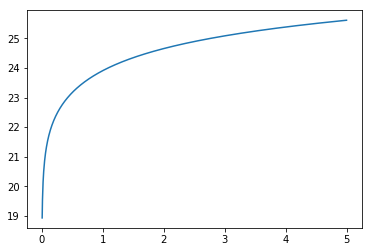

In [3]:
z = np.linspace(0,5,1000)
flux = 150E-6
vobs = 0.15
spec_index = -0.8
gal = radio_galaxy(z,flux,vobs,spec_index)
rad_lum = gal.radio_luminosity(0.15)

plt.plot(z,np.log10(rad_lum))
plt.show()